In [39]:
import numpy as np
import pandas as pd
import catboost
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import json
import os
import graphviz
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
df = pd.read_csv('Top_20_df.csv')
df.shape

(335113, 210)

In [3]:
# Splitting the dataset into X and y
X = df.drop('target', axis=1)  # Features: all columns except 'target'
y = df['target']

In [4]:
for column in X.columns:
    # Convert to string, including NaNs which become 'nan'
    X[column] = X[column].astype(str)

In [5]:
# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
categorical_features = ['ContactMonth', 'ContactHour', 'os_112', 'os_110', 's_247_71',
       's_239_8', 's_247_75', 's_239_7', 's_248_74', 's_247_77', 's_239_9',
       's_241_68', 's_241_69', 's_247_78', 's_239_10', 's_247_73']

In [7]:
pool = Pool(X_train, y_train, cat_features=categorical_features, feature_names=list(X.columns))

In [8]:
catboost_model = CatBoostClassifier(
    iterations = 800,
    learning_rate = 0.01,
    reg_lambda=0.5,
    eval_metric='Logloss',
    max_depth = 5,
    colsample_bylevel = 0.70,
    random_strength = 1,
    random_state = 42,
    bootstrap_type = 'Bayesian',
    bagging_temperature=0.6,
    auto_class_weights = 'Balanced'
    )

catboost_model.fit(pool,eval_set = [(X_test, y_test)], use_best_model=True, early_stopping_rounds=50)

0:	learn: 0.6814053	test: 0.6814554	best: 0.6814554 (0)	total: 113ms	remaining: 1m 30s
1:	learn: 0.6707363	test: 0.6708056	best: 0.6708056 (1)	total: 169ms	remaining: 1m 7s
2:	learn: 0.6605909	test: 0.6607768	best: 0.6607768 (2)	total: 223ms	remaining: 59.2s
3:	learn: 0.6511179	test: 0.6512594	best: 0.6512594 (3)	total: 276ms	remaining: 55s
4:	learn: 0.6423042	test: 0.6424944	best: 0.6424944 (4)	total: 335ms	remaining: 53.2s
5:	learn: 0.6339231	test: 0.6341391	best: 0.6341391 (5)	total: 387ms	remaining: 51.2s
6:	learn: 0.6264771	test: 0.6266707	best: 0.6266707 (6)	total: 443ms	remaining: 50.2s
7:	learn: 0.6192087	test: 0.6194372	best: 0.6194372 (7)	total: 498ms	remaining: 49.3s
8:	learn: 0.6123479	test: 0.6125950	best: 0.6125950 (8)	total: 554ms	remaining: 48.7s
9:	learn: 0.6062010	test: 0.6064865	best: 0.6064865 (9)	total: 611ms	remaining: 48.3s
10:	learn: 0.6002251	test: 0.6005291	best: 0.6005291 (10)	total: 673ms	remaining: 48.3s
11:	learn: 0.5946642	test: 0.5949669	best: 0.5949669 

In [14]:
# catboost_model.save_model(
#     "catboost_model2.json",
#     format="json",
#     pool=pool  # this parameter is required only for models with categorical features.
# )

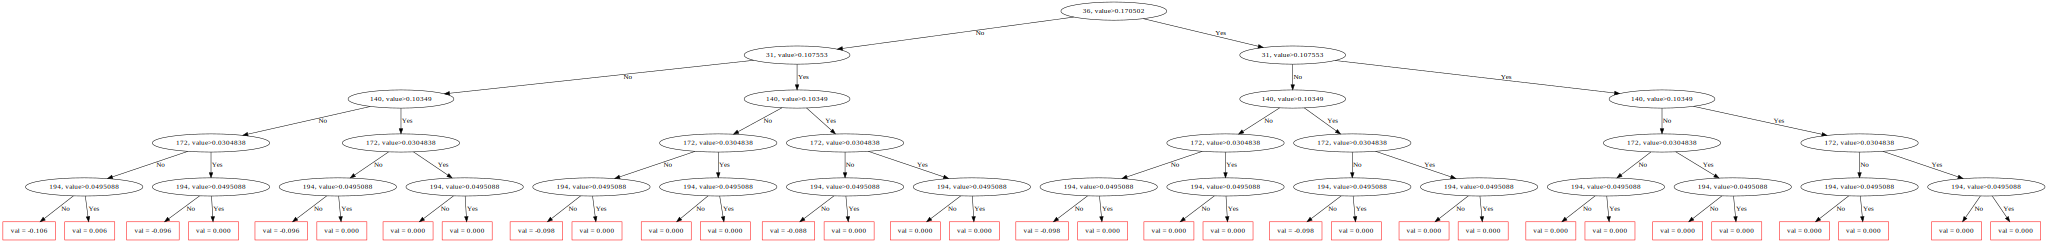

In [9]:
catboost_model.plot_tree(tree_idx=1)

In [54]:
tree_plot = catboost_model.plot_tree(tree_idx=5,pool=pool)
tree_plot.render('tree_5_plot')

'tree_5_plot.pdf'